In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pcl
import numpy as np
import random
import sys
sys.path.append("/workspace/include")
from visualization_helper import *
from filter import *
import k3d

%matplotlib inline

In [63]:
# What are the best values?
resolution = 128.0 #128.f 
radius = 0.9 #256.0f * rand () / (RAND_MAX + 1.0f);

- The **resolution parameter** describes the length of the smallest voxels at lowest octree level.
- The depth of the octree is therefore a function of the resolution as well as the spatial dimension of the pointcloud.
- If a bounding box of the pointcloud is know, it should be assigned to the octree by using the defineBoundingBox method. 
- Then we assign a pointer to the PointCloud and add all points to the octree.


# DayTime Cloudpoint

<PointCloud of 18376 points>
(x) : 92.6m
(y) : 87.4m
(z) : 10.3m


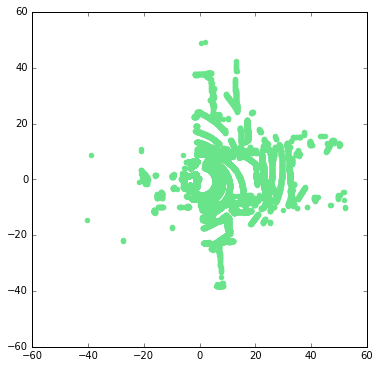

In [10]:
cloud = pcl.PointCloud()
cloud.from_file('background_person.pcd')
print(cloud)
visualization2d_arr_xyz(cloud.to_array())

# NightTime Cloudpoint

<PointCloud of 8028 points>
(x) : 29.9m
(y) : 87.4m
(z) : 9.8m


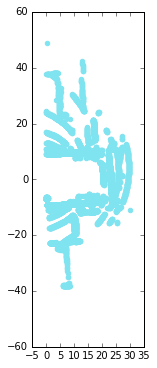

In [36]:
searchPoint = pcl.PointCloud()
searchPoint.from_file('background.pcd')
print(searchPoint)
visualization2d_arr_xyz(searchPoint.to_array())

# Octree &  Backgroud`(=DayTime-NightTime)` extraction 

(x) : 55.5m
(y) : 48.5m
(z) : 8.8m
<PointCloud of 213 points>


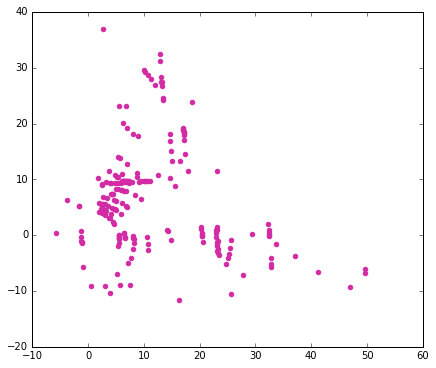

In [61]:
octree = cloud.make_octreeSearch(resolution)
octree.add_points_from_input_cloud()


backroud = cloud

# backroud = DayTime(=cloud) - NightTime(=searchPoint)
# vox위치값을 기반으로 radius거리의 cloud제거
for i in range(0,searchPoint.size-1):
    searchPoints = (searchPoint[i][0], searchPoint[i][1], searchPoint[i][2])
    [ind, sqdist] = octree.radius_search (searchPoints, radius)
    lind = ind.tolist()
    backroud = backroud.extract(lind,negative=True)
    
visualization2d_arr_xyz(backroud.to_array())
print(backroud)

## Expected Result 

![](https://i.imgur.com/ouW6Dhu.png)

Expected Result  = The Red box 

### [TEST] Result = Daytime - Daytime

In [48]:
resolution = 0.5#0.2
octree = cloud.make_octreeSearch(resolution)
octree.add_points_from_input_cloud()

radius = 0.8
backroud = cloud

# backroud = DayTime(=cloud) - NightTime(=searchPoint)
# vox위치값을 기반으로 radius거리의 cloud제거
for i in range(0,cloud.size-1):
    searchPoints = (cloud[i][0], cloud[i][1], cloud[i][2])
    [ind, sqdist] = octree.radius_search (searchPoints, radius)
    lind = ind.tolist()
    backroud = backroud.extract(lind,negative=True)
    
#visualization2d_arr_xyz(backroud.to_array())
print(backroud)

<PointCloud of 0 points>
